In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import gseapy
import matplotlib.pyplot as plt

sc.settings.verbosity = 2             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()

In [ ]:
sc.settings.set_figure_params(dpi=80)

In [2]:
adata = sc.read('./write/Ingest_all_small.h5ad')

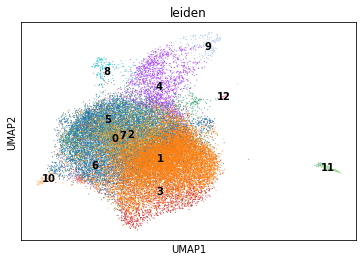

In [3]:
sc.pl.umap(adata, color='leiden', legend_loc='on data')

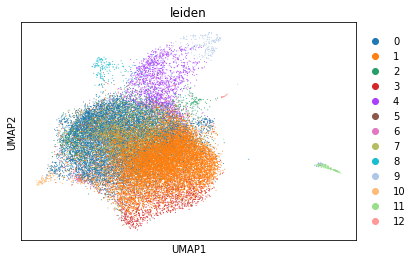

In [4]:
sc.pl.umap(adata, color='leiden')

In [5]:
adata.obs.groupby(["age"]).apply(len)

age
adult    11000
old       9407
young    11502
dtype: int64

In [6]:
sc.tl.embedding_density(adata, groupby='batch')

computing density on 'umap'


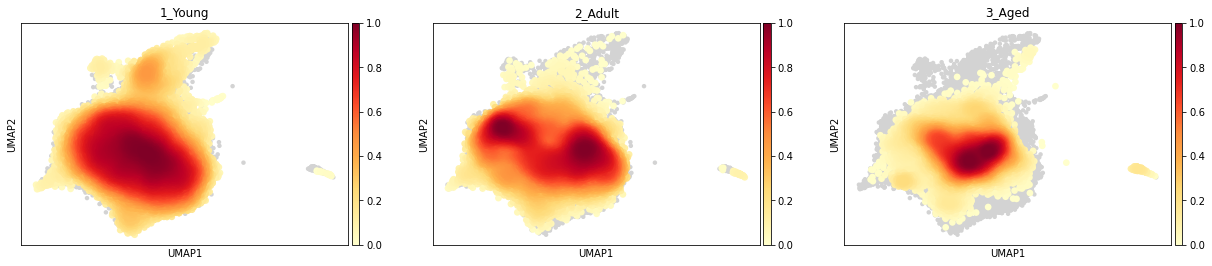

In [7]:
sc.pl.embedding_density(adata, groupby='batch')

In [8]:
#want to look at the distribution of aged cells per cluster

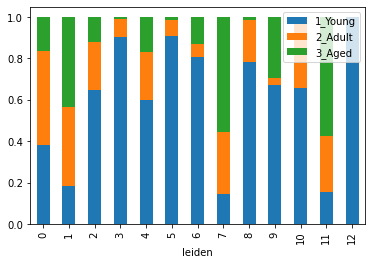

In [9]:
tmp = pd.crosstab(adata.obs['leiden'],adata.obs['batch'], normalize='index')
tmp.plot.bar(stacked=True).legend(loc='upper right')

In [10]:
pd.crosstab(adata.obs['leiden'],adata.obs['batch'], normalize='index')

batch,1_Young,2_Adult,3_Aged
leiden,,,
0,0.383464,0.452650,0.163886
1,0.184883,0.379196,0.435921
2,0.649316,0.227964,0.122720
3,0.904061,0.085344,0.010594
4,0.597135,0.234957,0.167908
5,0.906000,0.078000,0.016000
6,0.806011,0.065574,0.128415
7,0.143703,0.303014,0.553283
8,0.781116,0.206009,0.012876


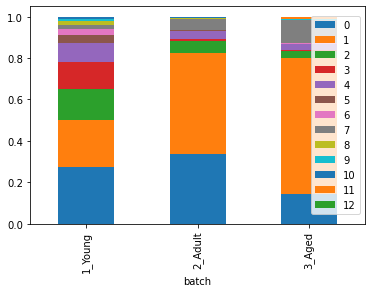

In [11]:
tmp = pd.crosstab(adata.obs['batch'],adata.obs['leiden'], normalize='index')
tmp.plot.bar(stacked=True).legend(loc='right')

In [12]:
pd.crosstab(adata.obs['batch'],adata.obs['leiden'], normalize='index')

leiden,0,1,2,3,4,5,6,7,8,9,10,11,12
batch,,,,,,,,,,,,,
1_Young,0.271779,0.228395,0.148583,0.133542,0.090593,0.039384,0.025648,0.023213,0.015823,0.011998,0.007390,0.002174,0.001478
2_Adult,0.335455,0.489818,0.054545,0.013182,0.037273,0.003545,0.002182,0.051182,0.004364,0.000636,0.003727,0.004091,0.000000
3_Aged,0.142022,0.658446,0.034336,0.001913,0.031147,0.000850,0.004996,0.109280,0.000319,0.006378,0.000319,0.009993,0.000000


In [ ]:
#if you want to save your barplot as a pdf
import matplotlib.pyplot as plt
ax = tmp.plot.bar(stacked=True)
ax.figure.savefig('demo-file.pdf')